In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/student-depression-dataset/Student Depression Dataset.csv")

In [3]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000
mean,70442.953402,25.822174,3.141336,0.000430,7.656160,2.943974,0.000681,7.156570,3.139867,0.585526
std,40642.015063,4.905651,1.381462,0.043994,1.470708,1.361122,0.044397,3.707598,1.437347,0.492640
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35040.750000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70689.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105824.750000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [8]:
df.select_dtypes(include='object')['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [9]:
df.select_dtypes(include='object')['Sleep Duration'].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       'Others'], dtype=object)

In [10]:
df.select_dtypes(include='object')['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi',
       'City', '3.0', 'Less than 5 Kalyan', 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

In [11]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].replace({'Yes': 1, 'No': 0})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0})
df['Sleep Duration'] = df['Sleep Duration'].replace({'5-6 hours':6,'Less than 5 hours':5,'7-8 hours':8, 'More than 8 hours': 10, 'Others':0})
df['Dietary Habits'] = df['Dietary Habits'].replace({'Healthy':3,'Moderate':2,'Unhealthy':1, 'Others':0})
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,6,3,B.Pharm,1,3.0,1.0,0,1
1,8,0,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,6,2,BSc,0,3.0,2.0,1,0
2,26,1,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,5,3,BA,0,9.0,1.0,1,0
3,30,0,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,8,2,BCA,1,4.0,5.0,1,1
4,32,0,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,6,2,M.Tech,1,1.0,1.0,0,0


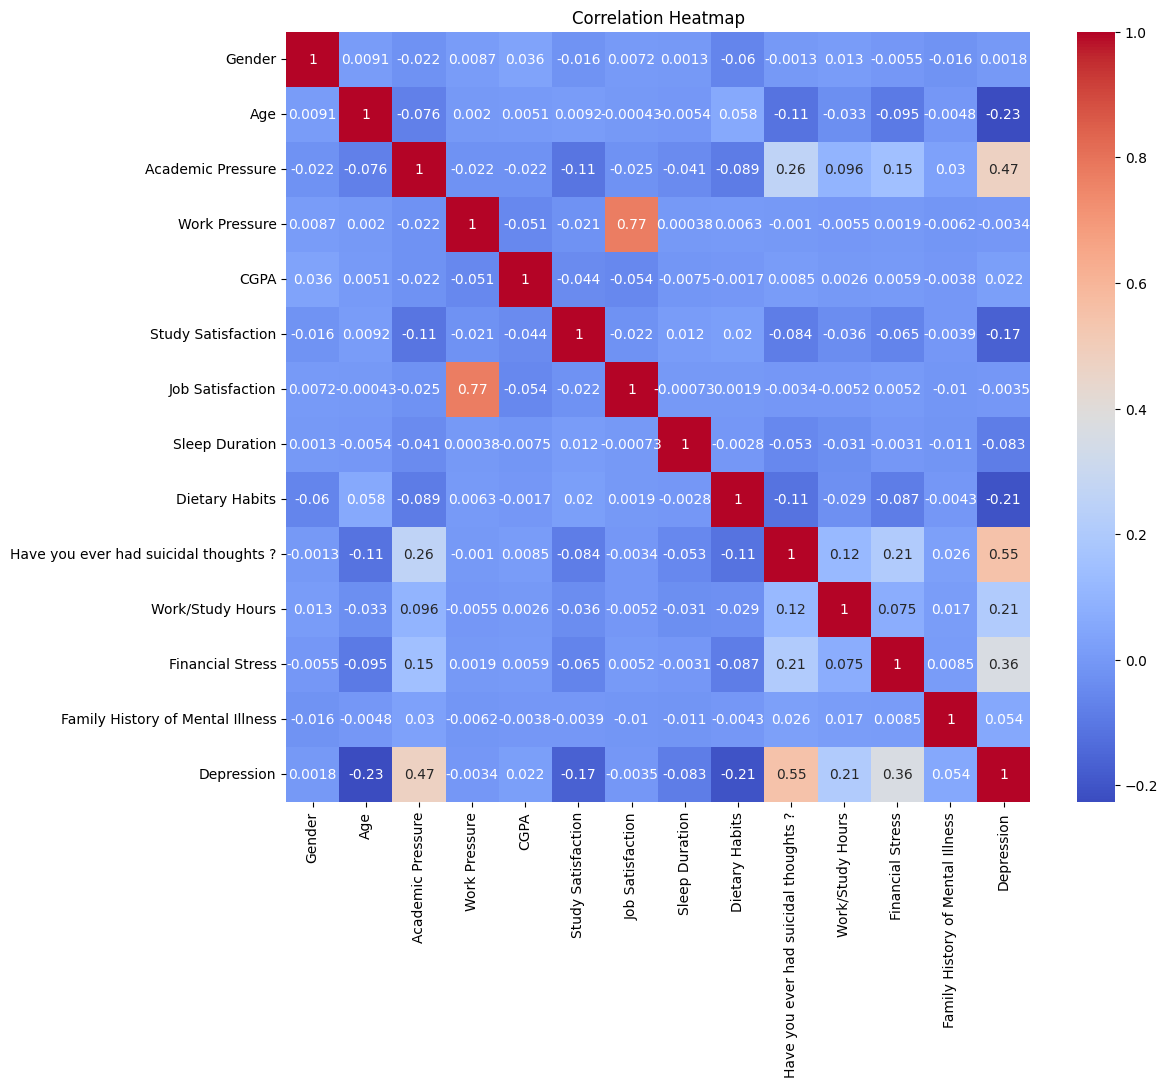

In [12]:
df_corr = df.drop(["id", "City", "Profession", "Degree"], axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
from sklearn.preprocessing import OneHotEncoder
def ohe_enc(df, feature):
    ohe = OneHotEncoder(drop='first', sparse_output=False)
    enc_feature = ohe.fit_transform(df[[feature]])
    feature_names = ohe.get_feature_names_out(input_features=[feature])
    enc_df = pd.DataFrame(enc_feature, columns=feature_names)
    return enc_df

In [14]:
city_df = ohe_enc(df, 'City')
profession_df = ohe_enc(df, 'Profession')
degree_df = ohe_enc(df, 'Degree')
diet_df = ohe_enc(df, 'Dietary Habits')

In [15]:
df = df.drop(['id', 'City', 'Profession', 'Dietary Habits', 'Degree'], axis=1)
df = pd.concat([df, city_df, profession_df, degree_df, diet_df], axis=1)
df.head(5)

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Dietary Habits_1,Dietary Habits_2,Dietary Habits_3
0,1.0,33.0,5.0,0.0,8.97,2.0,0.0,6.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,24.0,2.0,0.0,5.90,5.0,0.0,6.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,31.0,3.0,0.0,7.03,5.0,0.0,5.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,28.0,3.0,0.0,5.59,2.0,0.0,8.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,25.0,4.0,0.0,8.13,3.0,0.0,6.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Split

In [16]:
df.isna().sum()
df.dropna(inplace=True)

In [17]:
X = df.drop('Depression', axis=1)
y = df['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

# Model

In [18]:
num_samples = 1000
num_features = 10

In [19]:
models = {
    'BaggingClassifier': BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [20]:
classifiers = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=50, random_state=42)
]

In [21]:
for clf in classifiers:
    clf.fit(X_train, y_train)

## Max

In [22]:
predictions = np.array([clf.predict(X_test) for clf in classifiers])
max_voting_preds = mode(predictions, axis=0).mode.flatten()

## AVG

In [23]:
probabilities = np.array([clf.predict_proba(X_test)[:, 1] for clf in classifiers])
averaging_preds = (probabilities.mean(axis=0) > 0.5).astype(int)

## Weighted Average

In [24]:
weights = [0.2, 0.3, 0.5]
weighted_preds = (np.average(probabilities, axis=0, weights=weights) > 0.5).astype(int)

# Advanced Ensemble Techniques

## Bagging

In [25]:
# Advanced Ensemble Techniques
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)

## Boosting

In [26]:
boosting_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
boosting_clf.fit(X_train, y_train)
y_pred_boosting = boosting_clf.predict(X_test)

## Stacking

In [27]:
stacking_model = StackingClassifier(
    estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('dt', DecisionTreeClassifier())],
    final_estimator=LogisticRegression()
)
stacking_model.fit(X_train, y_train)
stacking_preds = stacking_model.predict(X_test)

In [28]:
# Metrics dictionary
metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

In [29]:
# Evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Add results for basic techniques
basic_techniques = {
    "Max Voting": max_voting_preds,
    "Averaging": averaging_preds,
    "Weighted Average": weighted_preds,
    "Stacking": stacking_preds
}
for technique, preds in basic_techniques.items():
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

    results[technique] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Display results
print("\nPerformance of Ensemble Models:\n")
print(results_df)


Performance of Ensemble Models:

                            Accuracy  Precision    Recall  F1 Score
BaggingClassifier           0.833303   0.849746  0.868993  0.859262
RandomForestClassifier      0.838502   0.847328  0.883379  0.864978
AdaBoostClassifier          0.845851   0.855329  0.886746  0.870754
GradientBoostingClassifier  0.845492   0.855664  0.885522  0.870337
XGBClassifier               0.839756   0.854497  0.875421  0.864832
Max Voting                  0.838681   0.851918  0.876951  0.864253
Averaging                   0.813228   0.830217  0.856137  0.842978
Weighted Average            0.816813   0.833185  0.859198  0.845992
Stacking                    0.844417   0.855829  0.883073  0.869238


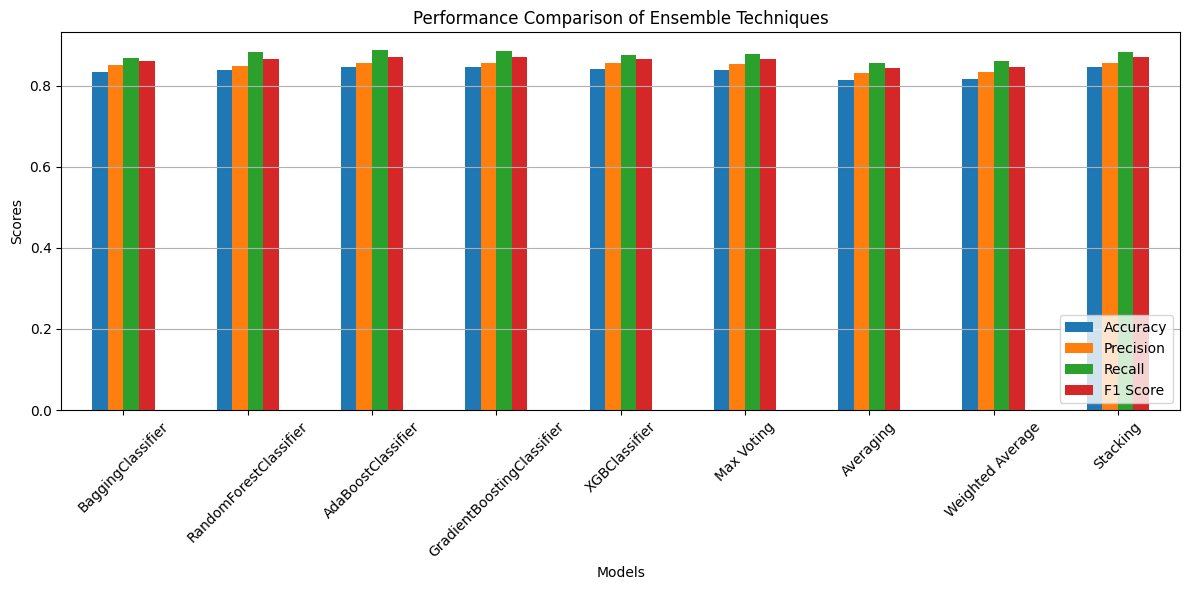

In [30]:
# Visualization
results_df.plot(kind='bar', figsize=(12, 6), rot=45)
plt.title("Performance Comparison of Ensemble Techniques")
plt.ylabel("Scores")
plt.xlabel("Models")
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()